In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [224]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [225]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274169 entries, 0 to 1274168
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1274169 non-null  int64  
 1   kWh       1274169 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 19.4 MB


In [226]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1274164    0.13
1274165    0.13
1274166    0.13
1274167    0.18
1274168    0.21
Name: kWh, Length: 1274169, dtype: float64

In [227]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1274164    0.13
1274165    0.13
1274166    0.13
1274167    0.18
1274168    0.21
Name: kWh, Length: 1274169, dtype: float64

In [228]:
l=len(conso_data)-1
l

1274168

In [229]:
conso_data['sec']=conso_data['Interval']/1000


In [230]:
conso_data['Wh']=3600000/conso_data['Interval']


In [231]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [232]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274169 entries, 0 to 1274168
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1274169 non-null  int64  
 1   kWh        1274169 non-null  float64
 2   sec        1274169 non-null  float64
 3   Wh         1274169 non-null  float64
 4   cumul(ms)  1274169 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 48.6 MB


In [233]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1274164,27906,0.13,27.906,129.004515,30069705030
1274165,28084,0.13,28.084,128.186868,30069733114
1274166,28219,0.13,28.219,127.573621,30069761333
1274167,20256,0.18,20.256,177.725118,30069781589
1274168,17349,0.21,17.349,207.504755,30069798938


In [234]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

30069798938000

In [235]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 10, 21, 738666)

In [236]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [237]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [238]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [239]:
conso_data['dates']

0         2023-08-21 19:10:43.672666
1         2023-08-21 19:11:05.530666
2         2023-08-21 19:11:27.531666
3         2023-08-21 19:11:49.459666
4         2023-08-21 19:12:11.350666
                     ...            
1274164   2024-08-03 19:52:06.768666
1274165   2024-08-03 19:52:34.852666
1274166   2024-08-03 19:53:03.071666
1274167   2024-08-03 19:53:23.327666
1274168   2024-08-03 19:53:40.676666
Name: dates, Length: 1274169, dtype: datetime64[ns]

In [240]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:10:43.672666,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:11:05.530666,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:11:27.531666,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:11:49.459666,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:12:11.350666,21/08/23
...,...,...,...,...,...,...,...
1274164,27906,0.13,27.906,129.004515,30069705030,2024-08-03 19:52:06.768666,03/08/24
1274165,28084,0.13,28.084,128.186868,30069733114,2024-08-03 19:52:34.852666,03/08/24
1274166,28219,0.13,28.219,127.573621,30069761333,2024-08-03 19:53:03.071666,03/08/24
1274167,20256,0.18,20.256,177.725118,30069781589,2024-08-03 19:53:23.327666,03/08/24


In [241]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('03/08/24', 3, 8, 2024)

In [242]:
here = now.strftime('%H:%M:%S')
here

'19:54:00'

In [243]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [244]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2723 entries, 1271446 to 1274168
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2723 non-null   int64         
 1   kWh        2723 non-null   float64       
 2   sec        2723 non-null   float64       
 3   Wh         2723 non-null   float64       
 4   cumul(ms)  2723 non-null   int64         
 5   dates      2723 non-null   datetime64[ns]
 6   days       2723 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 170.2+ KB


In [245]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [246]:
data = list(df_grp['kWh'])
print(data)


[0.825, 3.7, 4.232, 3.676, 4.189, 4.606, 3.527, 3.412, 3.513, 3.692, 3.761, 3.805, 4.251, 3.8, 3.474, 3.64, 3.32, 3.379, 4.281, 4.009, 4.043, 3.929, 3.445, 4.449, 3.75, 3.76, 4.349, 4.692, 3.812, 3.223, 3.18, 3.994, 3.677, 3.16, 3.801, 4.137, 3.76, 3.576, 4.776, 4.191, 4.543, 3.773, 3.41, 4.301, 3.88, 3.86, 3.439, 4.08, 3.656, 3.399, 4.133, 3.386, 3.886, 3.833, 3.642, 3.756, 4.244, 3.301, 3.872, 2.984, 2.055, 2.041, 2.451, 4.089, 3.721, 4.331, 3.612, 3.925, 3.742, 3.91, 3.998, 4.106, 3.652, 3.157, 3.804, 3.511, 3.624, 3.708, 3.685, 3.241, 3.904, 3.211, 3.793, 3.61, 4.08, 3.564, 3.388, 3.816, 4.065, 4.329, 4.135, 3.998, 4.232, 3.745, 3.927, 3.862, 3.914, 3.74, 4.047, 4.346, 3.884, 3.507, 3.682, 3.669, 3.349, 3.847, 3.995, 4.102, 3.475, 4.176, 3.605, 4.07, 4.538, 3.681, 3.432, 3.58, 4.159, 3.7, 4.084, 3.98, 3.746, 3.591, 5.127, 3.7, 3.766, 4.29, 4.104, 4.707, 4.404, 3.988, 3.774, 4.36, 4.683, 4.197, 4.79, 4.317, 3.726, 4.176, 3.704, 3.643, 3.531, 3.941, 3.677, 3.786, 3.578, 3.491, 3.876,

In [247]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [248]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [249]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [250]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.306281
dtype: float64

In [251]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.650914
dtype: float64

In [252]:
last=df_grp.iloc[-1]['kWh']
last

2.723

In [253]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2723 entries, 1271446 to 1274168
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2723 non-null   int64         
 1   kWh        2723 non-null   float64       
 2   sec        2723 non-null   float64       
 3   Wh         2723 non-null   float64       
 4   cumul(ms)  2723 non-null   int64         
 5   dates      2723 non-null   datetime64[ns]
 6   days       2723 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 170.2+ KB


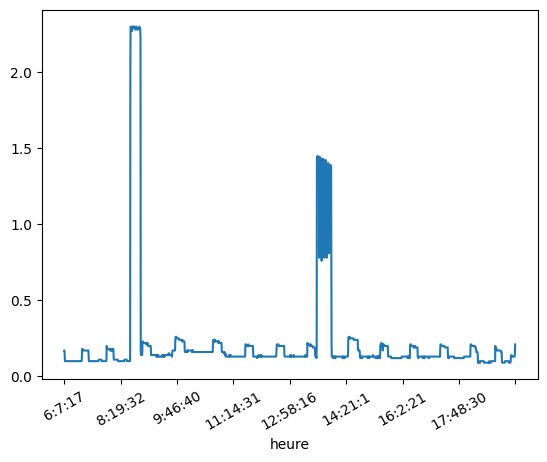

In [254]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [255]:
conso_day['heure']


1271446      0:0:13
1271447      0:0:42
1271448      0:1:12
1271449      0:1:43
1271450      0:2:15
             ...   
1274164     19:52:6
1274165    19:52:34
1274166     19:53:3
1274167    19:53:23
1274168    19:53:40
Name: heure, Length: 2723, dtype: object

In [256]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:13',
              days   kWh
  heure                 
  0:0:13  03/08/24  0.11),
 ('0:0:42',
              days   kWh
  heure                 
  0:0:42  03/08/24  0.12),
 ('0:1:12',
              days   kWh
  heure                 
  0:1:12  03/08/24  0.12),
 ('0:1:43',
              days   kWh
  heure                 
  0:1:43  03/08/24  0.12),
 ('0:2:15',
              days   kWh
  heure                 
  0:2:15  03/08/24  0.11),
 ('0:2:46',
              days   kWh
  heure                 
  0:2:46  03/08/24  0.12),
 ('0:3:17',
              days   kWh
  heure                 
  0:3:17  03/08/24  0.12),
 ('0:3:48',
              days   kWh
  heure                 
  0:3:48  03/08/24  0.12),
 ('0:4:20',
              days   kWh
  heure                 
  0:4:20  03/08/24  0.12),
 ('0:4:51',
              days   kWh
  heure                 
  0:4:51  03/08/24  0.11),
 ('0:5:22',
              days   kWh
  heure                 
  0:5:22  03/08/24  0.12),
 ('0:5:54',
         

In [257]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:13',
  heure
  0:0:13    0.11
  Name: kWh, dtype: float64),
 ('0:0:42',
  heure
  0:0:42    0.12
  Name: kWh, dtype: float64),
 ('0:1:12',
  heure
  0:1:12    0.12
  Name: kWh, dtype: float64),
 ('0:1:43',
  heure
  0:1:43    0.12
  Name: kWh, dtype: float64),
 ('0:2:15',
  heure
  0:2:15    0.11
  Name: kWh, dtype: float64),
 ('0:2:46',
  heure
  0:2:46    0.12
  Name: kWh, dtype: float64),
 ('0:3:17',
  heure
  0:3:17    0.12
  Name: kWh, dtype: float64),
 ('0:3:48',
  heure
  0:3:48    0.12
  Name: kWh, dtype: float64),
 ('0:4:20',
  heure
  0:4:20    0.12
  Name: kWh, dtype: float64),
 ('0:4:51',
  heure
  0:4:51    0.11
  Name: kWh, dtype: float64),
 ('0:5:22',
  heure
  0:5:22    0.12
  Name: kWh, dtype: float64),
 ('0:5:54',
  heure
  0:5:54    0.11
  Name: kWh, dtype: float64),
 ('0:6:25',
  heure
  0:6:25    0.12
  Name: kWh, dtype: float64),
 ('0:6:56',
  heure
  0:6:56    0.12
  Name: kWh, dtype: float64),
 ('0:7:27',
  heure
  0:7:27    0.12
  Name: kWh, dtype: float

In [258]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:13,32779,0.11,32.779,109.826413,29998191602,2024-08-03 00:00:13.340666,03/08/24
0:0:42,29388,0.12,29.388,122.498979,29998220990,2024-08-03 00:00:42.728666,03/08/24
0:1:12,30098,0.12,30.098,119.609276,29998251088,2024-08-03 00:01:12.826666,03/08/24
0:1:43,31161,0.12,31.161,115.529027,29998282249,2024-08-03 00:01:43.987666,03/08/24
0:2:15,31344,0.11,31.344,114.854518,29998313593,2024-08-03 00:02:15.331666,03/08/24
...,...,...,...,...,...,...,...
19:52:6,27906,0.13,27.906,129.004515,30069705030,2024-08-03 19:52:06.768666,03/08/24
19:52:34,28084,0.13,28.084,128.186868,30069733114,2024-08-03 19:52:34.852666,03/08/24
19:53:3,28219,0.13,28.219,127.573621,30069761333,2024-08-03 19:53:03.071666,03/08/24


In [259]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [260]:
df.iloc[0].dates

Timestamp('2024-08-03 00:00:13.340666')

In [261]:
df.dates.dt.time

heure
0:0:13      00:00:13.340666
0:0:42      00:00:42.728666
0:1:12      00:01:12.826666
0:1:43      00:01:43.987666
0:2:15      00:02:15.331666
                 ...       
19:52:6     19:52:06.768666
19:52:34    19:52:34.852666
19:53:3     19:53:03.071666
19:53:23    19:53:23.327666
19:53:40    19:53:40.676666
Name: dates, Length: 2723, dtype: object

In [262]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [263]:
tranches = len(df)//1000
tranches+1

3

In [264]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-08-03 00:00:13.340666	2024-08-03 08:34:26.227666	8h 34m 12s 	1000
2024-08-03 08:34:26.227666	2024-08-03 14:29:02.164666	5h 54m 35s 	2000
2024-08-03 14:29:02.164666	2024-08-03 19:53:40.676666	5h 24m 38s 	723


In [265]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('19:54:00', 2.723, 2723)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2723 entries, 0:0:13 to 19:53:40
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2723 non-null   int64         
 1   kWh        2723 non-null   float64       
 2   sec        2723 non-null   float64       
 3   Wh         2723 non-null   float64       
 4   cumul(ms)  2723 non-null   int64         
 5   dates      2723 non-null   datetime64[ns]
 6   days       2723 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 234.7+ KB


In [267]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [268]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 21/08/23 to 03/08/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     349 non-null    float64
dtypes: float64(1)
memory usage: 5.5+ KB


In [269]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [270]:
df_grp.tail(7)

,kWh
days,
28/07/24,2.882
29/07/24,3.072
30/07/24,3.677
31/07/24,3.690
01/08/24,3.867
02/08/24,3.033
03/08/24,2.723


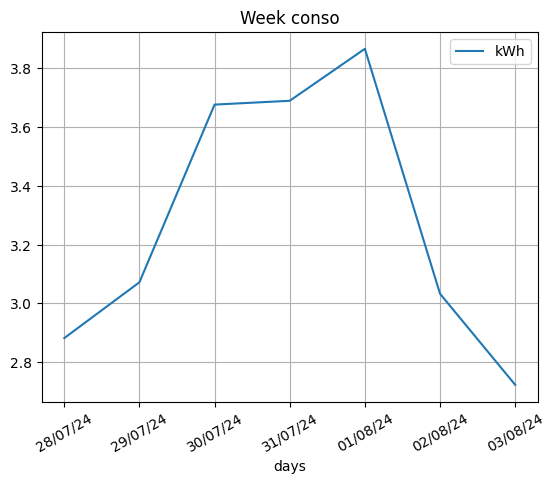

In [271]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [272]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [273]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


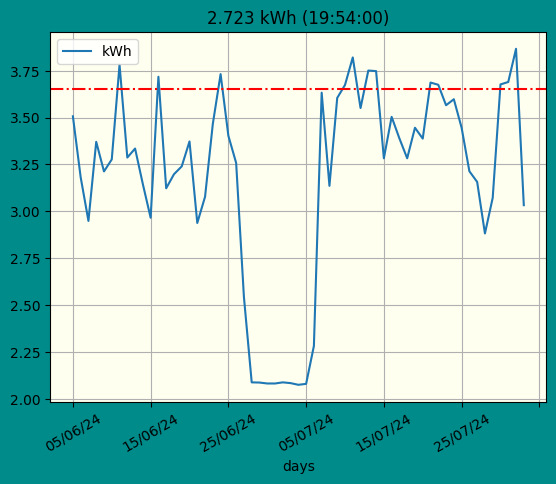

In [274]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [275]:
df_grp.mean()

kWh    3.650914
dtype: float64

In [276]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
21/07/24,3.687
22/07/24,3.675
23/07/24,3.566
24/07/24,3.598
25/07/24,3.446
26/07/24,3.214
27/07/24,3.157
28/07/24,2.882
29/07/24,3.072


In [277]:
df_grp

,kWh
days,
21/08/23,0.825
22/08/23,3.700
23/08/23,4.232
24/08/23,3.676
25/08/23,4.189
...,...
30/07/24,3.677
31/07/24,3.690
01/08/24,3.867


In [278]:
df_grp.tail(100).mean()

kWh    3.34592
dtype: float64

<Axes: xlabel='days'>

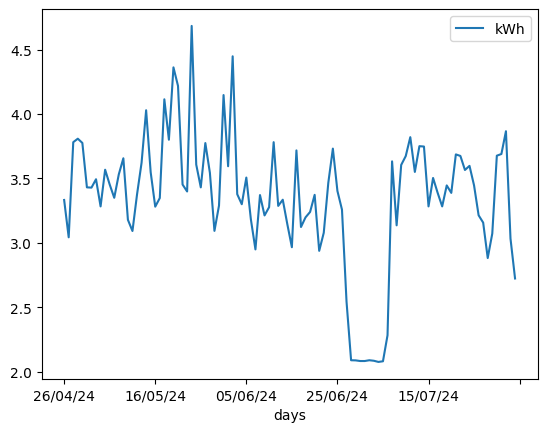

In [279]:
df_grp.tail(100).plot()

In [280]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.340433
std,0.476248
min,2.075000
25%,3.171250
50%,3.475000
75%,3.674750
max,3.867000


In [281]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

01/08/24 3.867
04/07/24 2.075


In [282]:
day

'03/08/24'

In [283]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1271446,32779,0.11,32.779,109.826413,29998191602,2024-08-03 00:00:13.340666,03/08/24,0:0:13
1271447,29388,0.12,29.388,122.498979,29998220990,2024-08-03 00:00:42.728666,03/08/24,0:0:42
1271448,30098,0.12,30.098,119.609276,29998251088,2024-08-03 00:01:12.826666,03/08/24,0:1:12
1271449,31161,0.12,31.161,115.529027,29998282249,2024-08-03 00:01:43.987666,03/08/24,0:1:43
1271450,31344,0.11,31.344,114.854518,29998313593,2024-08-03 00:02:15.331666,03/08/24,0:2:15
...,...,...,...,...,...,...,...,...
1274164,27906,0.13,27.906,129.004515,30069705030,2024-08-03 19:52:06.768666,03/08/24,19:52:6
1274165,28084,0.13,28.084,128.186868,30069733114,2024-08-03 19:52:34.852666,03/08/24,19:52:34
1274166,28219,0.13,28.219,127.573621,30069761333,2024-08-03 19:53:03.071666,03/08/24,19:53:3
1274167,20256,0.18,20.256,177.725118,30069781589,2024-08-03 19:53:23.327666,03/08/24,19:53:23


In [284]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2723 entries, 1271446 to 1274168
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2723 non-null   int64         
 1   kWh        2723 non-null   float64       
 2   sec        2723 non-null   float64       
 3   Wh         2723 non-null   float64       
 4   cumul(ms)  2723 non-null   int64         
 5   dates      2723 non-null   datetime64[ns]
 6   days       2723 non-null   object        
 7   heure      2723 non-null   object        
 8   hours      2723 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 212.7+ KB


In [285]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1271446    00  0.11
  1271447    00  0.12
  1271448    00  0.12
  1271449    00  0.12
  1271450    00  0.11
  ...       ...   ...
  1271562    00  0.10
  1271563    00  0.10
  1271564    00  0.10
  1271565    00  0.10
  1271566    00  0.10
  
  [121 rows x 2 columns]),
 ('01',
          hours   kWh
  1271567    01  0.11
  1271568    01  0.11
  1271569    01  0.11
  1271570    01  0.11
  1271571    01  0.11
  ...       ...   ...
  1271679    01  0.10
  1271680    01  0.10
  1271681    01  0.10
  1271682    01  0.10
  1271683    01  0.10
  
  [117 rows x 2 columns]),
 ('02',
          hours   kWh
  1271684    02  0.11
  1271685    02  0.11
  1271686    02  0.11
  1271687    02  0.11
  1271688    02  0.11
  ...       ...   ...
  1271795    02  0.10
  1271796    02  0.10
  1271797    02  0.10
  1271798    02  0.10
  1271799    02  0.10
  
  [116 rows x 2 columns]),
 ('03',
          hours   kWh
  1271800    03  0.10
  1271801    03  0.11
  1271802    03  0.1

In [286]:
groupedbyhour.count()

,kWh
hours,
00,121
01,117
02,116
03,116
04,115
05,117
06,116
07,118
08,174


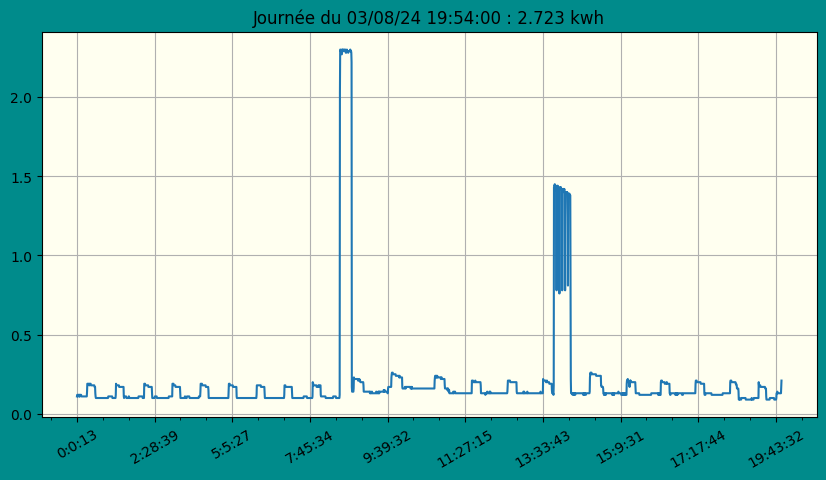

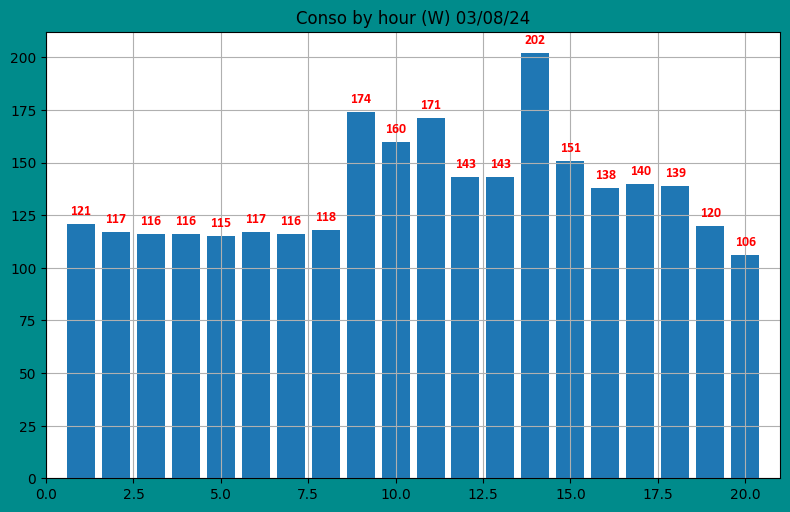

In [287]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [288]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [289]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [290]:
#conso_byhour(day)

In [291]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

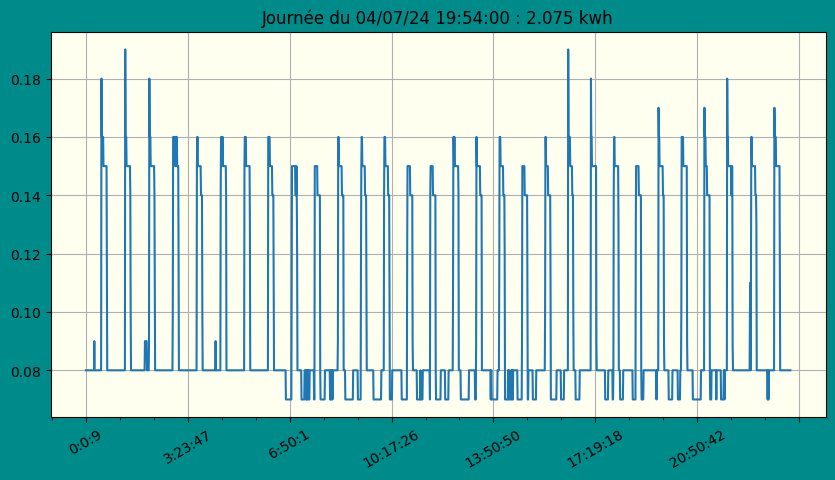

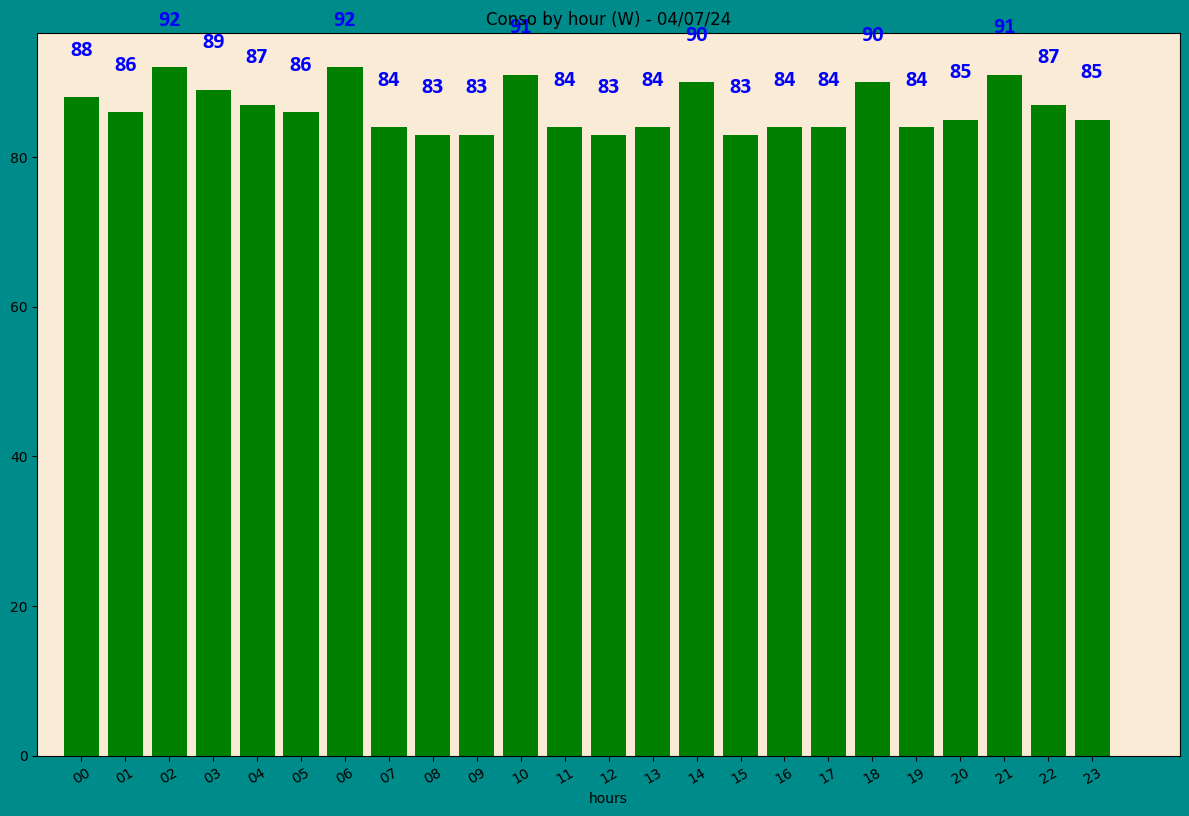

In [292]:
# plot any day
day = '04/07/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [293]:
month

days
04/07/24    2.075
05/07/24    2.080
06/07/24    2.282
07/07/24    3.633
08/07/24    3.136
09/07/24    3.605
10/07/24    3.674
11/07/24    3.821
12/07/24    3.551
13/07/24    3.751
14/07/24    3.748
15/07/24    3.283
16/07/24    3.504
17/07/24    3.389
18/07/24    3.283
19/07/24    3.446
20/07/24    3.388
21/07/24    3.687
22/07/24    3.675
23/07/24    3.566
24/07/24    3.598
25/07/24    3.446
26/07/24    3.214
27/07/24    3.157
28/07/24    2.882
29/07/24    3.072
30/07/24    3.677
31/07/24    3.690
01/08/24    3.867
02/08/24    3.033
Name: kWh, dtype: float64

In [294]:
month.idxmax()

'01/08/24'

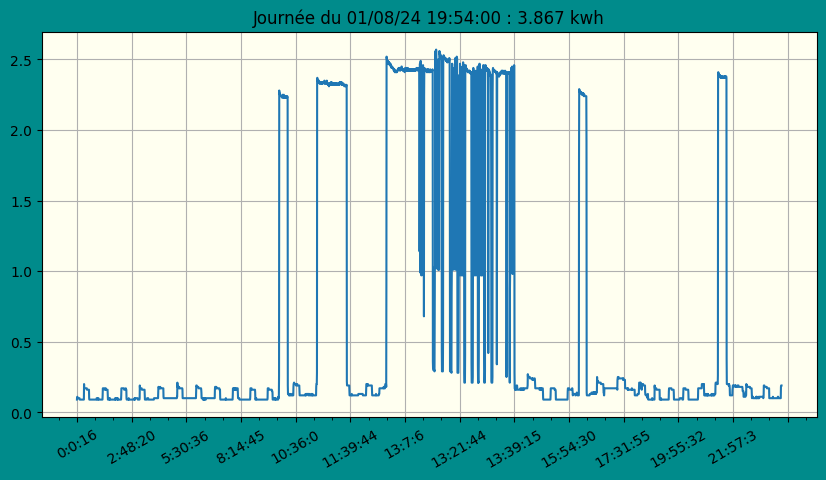

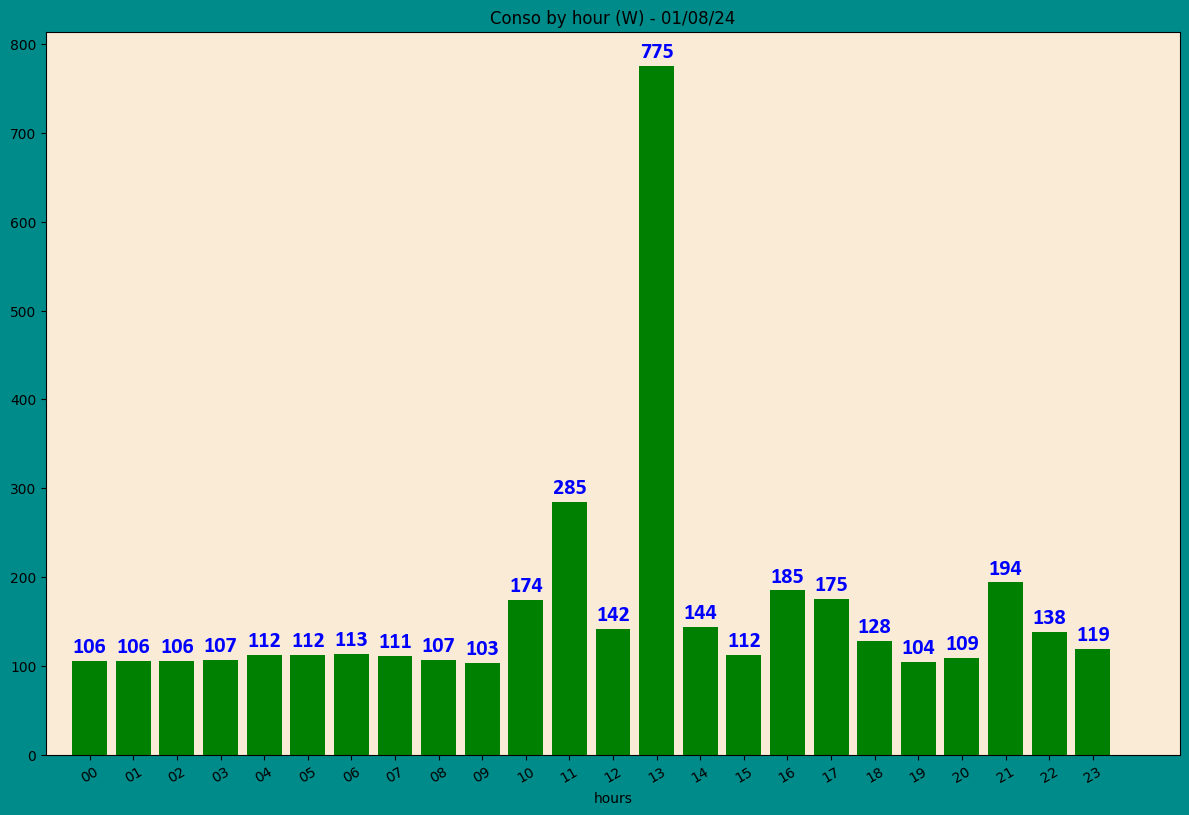

In [295]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [296]:
filename='conso_data.csv'
#conso_data.to_csv(filename)